#### Analysis of multiple stocks - for simulation over the course of n years at variable buy in frequency

Goal: This script simulates any number (typically 2) years of n-weekly prediction/closing_cost determinations and simulates for a series of chosen stocks if it is better to invest a consistent price or buy in higher/lower depending on the current performance of the stock.

Take any number of stocks and run a trendline through a series of overlapping cycles of variable length, creating a linear prediction to be applied. Assess the theoretical performance of adjusting contributions as compared to contributing a consistent amount over time.

This script only uses stock opening price and no other external variables. TBD introduction of other info.


Education:

This is an exercise in data transformation. Not statistics or predictive modeling, although the result would be similar to the intended results of predictive modeling. 

Limitations:

This script should be able to imitate any amount time using a series of strategies, given enough stock history available. The main misleading results this will give compared to paper trading is in choosing stocks and pretending you've been interested in them for n years.

In [705]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date
from datetime import datetime
import math
from sys import exit
import time
# import statsmodels.api as sm
# from statsmodels.regression.rolling import RollingOLS
from sklearn.linear_model import LinearRegression
import yahoo_fin.stock_info as si
from yahoofinancials import YahooFinancials
# import nasdaqdatalink

pd.options.mode.chained_assignment = None  # default='warn'
# from warnings import simplefilter
# simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

ymd = str(date.today().year) + str(date.today().month).zfill(2) + str(date.today().day).zfill(2)
ymd


'20220402'

In [706]:
# nasdaqdatalink.ApiConfig.api_key = "text"

In [707]:
"""
##### Current: Revisions 6: Dynamic Baseline

### Doing
redo the dynamic baseline based on earnings data
    key point - this is truly looking forward, although it doesn't have to be predicitve, statistically speaking
    no regression needed, just basic transformation
    rank the best performers over the last 4 or 8 quarters
    each subsection should end in a 0 to 1 multiplier where 1 is the best stock and 0 is the worst, min/max style



### To do
learn setting environmental keys - for API key usage
kill the copy warnings
trade_dow only works for stocks, broken for crypto
    make it work for crypto
    should be easy since there are no holidays for crypto
    allow any day to be chosen
test all the strategies on multiple conditions
    db = 130, 65
    stocks = main, random
    time period = main, high end, low end
    invest = 104, 52
        24 interations in all
        don't do it until I'm ready
        export all results
        decide on a strategy (probably opt5 or opt5_db)
Fix the section of the functions where ensuring you don't hit max spending is calculated
after baseline optimization is solid - try to wrench it into the original dictionary so I don't have to do it all twice
    or do 2 dictionaries keep things flexible?
what other yfinance data available?
fix the copy errors - do it right
be able to do any unit of time, not just days - make it 'units' of time
    so I can check on hypothetical minute to minute trading
    might take a total branch off this script
Start testing buy/sell every period based on a set budget
    will likely be a big job. maybe a lot of changes needed
    will possibly need to make it it's own script
    I do still want to compare to a standard buy and hold consistently approach as the baseline
create a bare bones version that just quickly says today's invest prices
Add functions
    Define a function for each strategy. Opt1, opt2 etc. Should be able to get them down to a few variables
create a strategy to find the ideal stocks to put bigger baseline investments into
fix the v variable aspect of the invest options. Will matter if I want to cap the max invest
bring in more predictor variables
    Find a better R^2 at a significant P-val and all that
    Should be easy to altar the current model - do it this week
I probably don't have to make a dictionary of n dfs, assign just the last row, then make a new df of all the last rows
    should be able to be done in fewer steps
    figure it out
for dynamic baseline, how to overcome drastic favoring of 1 stock when only a couple are chosen?
    make it so the worst pick doesn't HAVE to be at $1 invest
if choosing 65 rolldays, should be 90 for crypto
redo the roll days converter - shift from a series of if/then statements to something more dynamic
automate trade_type. it should be able to autop pick based on stock_list alone




### Fixed/Done
are all ranges 1-260 or are some 0-259? - one of them was corrected, the one that sets the pred independent variable (aka index)
test the dynamic roll_days - is it implemented everywhere it should be and everything works as expected? - seems good now
Fix the graphs to be dynamic for dates - esp the 3 graphs stuck together - can I make the number of stuck visuals dynamic? - dropped for now
Fix the final statement to say profit/loss or above/below dynamically
    seems to have an issue with the reversal of percents when the total profits are negative
    need to test with net loss stocks
Test for different 3 year periods of time
Fact check the dynamic dates - is everything really working?
I really need to fix the invest days to be always on Monday or something instead of every 10 trading days
    I can't actually trust this method until I do this
    probably means actually using time series instead of the index replacement -- nope
be able to run on SP500
    SP500 core profit is unbeleiveable - any error in the code? -- a few 'weeks' variables were kept stagnant as 49
error checking on too much history run
    have a whole section dedicated to it and say which stock and by how much it misses
Make a path to DL data and call to it again w/o issues
    For flights w/o internet
be able to do one stock at a time -- OR be able to bypass
3 options: every week, 2 weeks, 4 weeks, is ok if I can't do fully dynamic
test nth week variable for odd n's that create non-integers, like investing on 3rd weeks
    invest_weeks must be an integer
    re-check all new facets of weeks and invest_weeks
convert 'y' years of data to be 'w?' weeks.
    calculate exactly how much data are needed based on weeks to look back + length of the regression. with a week or two buffer
make the invest period dynamic
make some logic to warn when I'm asking for too much data and one of the stocks hasn't been around long enough
Fact check by trying different stocks entirely - do a series of poorly performing stocks, high performing stocks, and a mix
swap to open instead of open, it's more true to my practice
I'm picking heavy hitter stocks and then pretending I've been investing for 2 years
    I need to pick a series of random stocks and see if I still beat baseline
Add individual buy in prices. 
    Do a 2 variable loop along with my j stock variable? Do a pre logic to pick custom buy ins or make all the same if only one chosen
get opt5 ready or some other method
something wrong with the last table output - opt 5, when pred/open2 > 1.2
    the df data are ok, but this needs to be fixed ASAP
add in flight 1 and flight 2 of biweekly options
find BTC data - must do
    either through another package or manual DL and upload
    does the fact that BTC is daily mess up the code?
optimize the code that creates the pred calculation. Only the last row in each dictionary entry is used
replace most recent day entry with a to the minute entry
    suspect at 0630, the last day's value is assigned for a bit
    problem since I don't want to use Friday's open price on Monday morn
fix running the btc option
dynamic baseline based on 260 day regression - get it running
fix the stock vs crypto vs index issue
    Why is index different again? only has closing maybe?
Make a new list of random stocks that works - has enough history
make a series of new options with dynamic baseline
fix the summary stuff so I don't have to make new lines for every new strategy
fix the list contrib multiplier. did I delete it?
is my final profit output not normalized for investment? fix it if so
test strategy against raw data to confirm numbers
    against opt 5 and opt5_db
test - does a stock split effect the slope?
make a statement at the bottom that explicitly states what trade day the results are for
fix the error when 1 only stock is run
test trading mon morn vs all other weekday mornings
fix the final summary calculations section - breaks when you run 1 stock/crypto
crypto should run on a 7 day assumption
    if stock rolls days chose is 65, convert into 90 for crypto
why does laptop not work but pc works?
bypass running each strategy not chosen to visualize initially to cut down on run time
set a trade day for sat and sun (for crypto)
set a trade day of 'Today'
make my repetitive if else code more concise
new opt - buy in monday per opt 5, but check tue, wed, thurs, fri for new 1.2 pred/open opportunities and buy the difference

"""
print('complete')

complete


In [708]:
start = time.perf_counter()

Set options

In [709]:
##### User choices go here #####

### choose stocks, crypto, or index
# index option is because the day's open prices aren't available at 630am. Otherwise, index funds can be called a stock
trade_type = 'stock'
# trade_type = 'crypto'
# trade_type = 'index'

### choose stocks of interest
# stocks chosen must all have data for full range of dates
stock_list = ['AAPL', 'AMD', 'AMZN', 'CRM', 'GOOG', 'INTC', 'MSFT', 'NVDA', 'QQQ', 'SBUX', 'SQ', 'TSLA', 'TSM'] # core list
# stock_list = ['AAPL', 'AMD', 'AMZN', 'CRM', 'GOOG', 'INTC', 'MSFT', 'NVDA', 'SBUX', 'SQ', 'TSLA', 'TSM'] # core list - for EPS
# stock_list = ['BTC-USD', 'ETH-USD']
# stock_list = ['BTC-USD']
# stock_list = ['^GSPC'] # AKA S&P 500
# stock_list = ['VFIAX', 'VTIAX', 'VTSAX']
# stock_list = ['AAPL', 'SQ', 'TSLA'] # quicker for test runs
# stock_list = ['AAPL']
# stock_list = ['TDOC', 'PINS'] # for net loss test runs
# stock_list = ['FDX', 'TFC', 'DCI', 'DIS', 'MDLZ', 'ROST', 'MDT', 'RTX', 'V'] # random-ish stocks

### choose how much to contribute each weekly period
# may choose a single value for all stocks or a set of tailored values per stock
contrib_amt = [5.00, 3.75, 2.50, 1.25, 2.50, 3.75, 2.50, 3.75, 2.50, 2.50, 2.50, 5.00, 3.75] # for core list new
# contrib_amt = [5.00, 3.75, 2.50, 1.25, 2.50, 3.75, 2.50, 3.75, 2.50, 2.50, 5.00, 3.75] # for core list new - for EPS
# contrib_amt = [10]
# contrib_amt = [25]
# contrib_amt = [350, 50, 100] # for 3 index list

### use this to allot total baseline contrib to all stocks instead of choosing each stock
baseline_total_contrib = 40

### strategies to visualize
# do not call db (dynamic baseline) for only 1 stock. Also not recommended for only a few stocks
d_list = ['baseline', 'baseline_db', 'opt2', 'opt2_db', 'opt5', 'opt5_db', 'opt6', 'opt6_db', 'opt7', 'opt7_db', 'opt8']
# d_list = ['baseline', 'opt2', 'opt5', 'opt6', 'opt7', 'opt8']
# d_list = ['opt5']

### weeks to cover (not necessarily the number of weeks where investing occurs)
# 52 = 1 year, 104 = 2 years, etc
total_weeks = 104

### invest every nth week
# 1 = every week, 2 = every 2 weeks, etc
nth_week = 1

### number of days to roll into each linear regression.
# roll_days = 'month'
roll_days = 'quarter'
# roll_days = '2_quarter'
# roll_days = 'year'

### number of days to determine dynamic baseline
# baseline_roll_days = 'month'
# baseline_roll_days = 'quarter'
baseline_roll_days = '2_quarter'
# baseline_roll_days = 'year'

### which day of the week to trade? (passes to the next day if the market isn't open)(Fri passes to the next Mon if necessary)
# based on 1 round of testing, Thursday could provide better results, but it's a toss up. Just go with Monday
# trade_dow = 'Today' # set for today's DOW
trade_dow = 'Monday'
# trade_dow = 'Tuesday'
# trade_dow = 'Wednesday'
# trade_dow = 'Thursday'
# trade_dow = 'Friday'
# trade_dow = 'Saturday' # crypto only
# trade_dow = 'Sunday' # crypto only

### opt 5 + 6: threshold of consistent buying vs increased buying
buyvalue = 1.2

### opt 7: threshold of consistent buying vs increased buying
buyvalue2 = 1

### opt 5: if buyvalue hits, how much to multiply
# current strategy is (contrib_amt * pred/open2 * multiplier)
multiplier = 5

### opt 6: if buyvalue hits, how much to multiply
# current strategy is (contrib_amt * multiplier)
multiplier2 = 4

### opt 7: if buyvalue hits, how much to multiply
# current strategy is (contrib_amt * pred/open2 * multiplier)
multiplier3 = 1.5

### max amount to contribute per stock over the course of 2 years
# should be at least 50 times the bi-weekly contrib
# unlimited max is another viable strategy
invest = float('inf')
# invest = contrib_amt*invest_weeks



In [710]:
# convert roll days into the proper number, with respect to stock/index vs crypto
roll1 = {'month': 21, 'quarter': 65, '2_quarter': 130, 'year': 260}
roll2 = {'month': 30, 'quarter': 90, '2_quarter': 180, 'year': 365}
roll_dict = {'stock': roll1, 'index': roll1, 'crypto': roll2}

roll_days = roll_dict[trade_type][roll_days]
baseline_roll_days = roll_dict[trade_type][baseline_roll_days]

print(f'{trade_type = }')
print(f'{roll_days = }')
print(f'{baseline_roll_days = }')


trade_type = 'stock'
roll_days = 65
baseline_roll_days = 130


In [711]:
# number of years to visualize
if trade_type == 'crypto':
    day_hist = (total_weeks*7)+baseline_roll_days+1 # choose for crypto ~ trading every day
else:
    day_hist = (total_weeks*5)+baseline_roll_days+1 # choose for stocks ~ trading about 5 days per week

# weeks to actually invest on
invest_weeks = math.floor(total_weeks/nth_week)


print('Total invest amount over', total_weeks, 'weeks:', invest)
print('Number of invest weeks:', invest_weeks)
print('Days of data to pull:', day_hist)

Total invest amount over 104 weeks: 100
Number of invest weeks: 104
Days of data to pull: 651


In [712]:
# duplicate contrib_amt for all stocks if only 1 listed
if len(contrib_amt) == len(stock_list):
    pass
elif len(contrib_amt) == 1: 
    contrib_amt = [contrib_amt[0] for x in enumerate(stock_list)]
else:
    print('Incorrect length of contrib_amt. Make it match the length of the stock list or be 1 value')
    exit()

contrib_amt

[5.0, 3.75, 2.5, 1.25, 2.5, 3.75, 2.5, 3.75, 2.5, 2.5, 2.5, 5.0, 3.75]

Pull data

In [713]:
# check every 15 seconds for complete data
# wait times should only happen for ~1-2 minutes after market open on trading days (right after 0630am PST)

if trade_type == 'crypto' or trade_type == 'index':
  pass
else:
  x = 0
  while x < 1:
    df_now = yf.download(
      tickers = stock_list
      ,period = '1d' # set for 'today' instead
      ,interval = '1m'
    )

    # ensures a single stock can pass through, not just 2+ 
    if len(stock_list) == 1:
        df_now[stock_list[0]] = df_now['Open']
        df_now = df_now[[stock_list[0]]]
    else:
        df_now = df_now['Open']

    df_now = df_now.head(1) # open for today
    df_now = df_now.fillna(0)

    # df_now['Open', 'AAPL'] = 0 # force a 0 for testing

    x = 1
    for i in stock_list:
      # x = x * int(df_now['Open'][i])
      x = x * int(df_now[i])

    if x == 0: # wait 15 seconds if data aren't complete
      time.sleep(15)
    else:
      if df_now.index.day == date.today().day:
        print('Datetime of data available: ', datetime.now().strftime("%B %d, %Y %H:%M:%S"))
      else:
        print('Warning, today\'s data not yet available')

  df_now


# When compared to later in the day, open prices are a few cents off. Seems fine. Much better than pretending Friday open is the Monday open
# Datetime of data available:  January 28, 2022 06:31:36
# Datetime of data available:  January 31, 2022 06:31:27
# Datetime of data available:  February 01, 2022 06:31:05
# Datetime of data available:  February 02, 2022 06:31:11
# Datetime of data available:  February 03, 2022 06:31:15
# Datetime of data available:  February 07, 2022 06:31:07
# Datetime of data available:  February 28, 2022 06:31:44
# Datetime of data available:  March 01, 2022 06:31:04
# Datetime of data available:  March 23, 2022 06:32:07


[*********************100%***********************]  13 of 13 completed
Warning, today's data not yet available


In [714]:
# check the traditional open price
df_open_check = yf.download(
    tickers = stock_list
    # ,start = '2022-01-15'
    # ,end = '2022-01-18'
    ,period = str(day_hist) + 'd'
)
df_open_check['Open'].tail(2)

[*********************100%***********************]  13 of 13 completed


AAPL         AMD         AMZN         CRM         GOOG  \
Date                                                                       
2022-03-31  177.839996  116.309998  3328.899902  214.500000  2848.969971   
2022-04-01  174.029999  110.480003  3282.989990  212.479996  2800.199951   

                 INTC        MSFT        NVDA         QQQ   SBUX          SQ  \
Date                                                                           
2022-03-31  51.200001  313.899994  277.820007  367.239990  91.32  139.520004   
2022-04-01  49.830002  309.369995  273.750000  362.809998  91.50  136.500000   

                   TSLA         TSM  
Date                                 
2022-03-31  1094.569946  106.959999  
2022-04-01  1081.150024  105.769997

In [715]:
### Overly complex way to pull data, but I have found that 'Open' prices are just a copy of the previous day for the first few minutes of the trading day
### This method pulls in the true Open prices for today much quicker (a couple minutes after 6:30am PST)

if trade_type == 'crypto' or trade_type == 'index':
    df = yf.download(
        tickers = stock_list
        # ,start = '2022-01-15'
        # ,end = '2022-01-18'
        ,period = str(day_hist) + 'd'
    )

    # ensures a single crypto or index can pass through, not just 2+ 
    if len(stock_list) == 1:
        df[stock_list[0]] = df['Open']
        df = df[[stock_list[0]]]
    else:
        df = df['Open']

else:
    # Pull all data except for today
    df_bulk = yf.download(
            tickers = stock_list
            # ,start = '2022-01-15'
            # ,end = '2022-01-18'
            ,period = str(day_hist) + 'd'
        )

    # ensures a single stock can pass through, not just 2+ 
    if len(stock_list) == 1:
        df_bulk[stock_list[0]] = df_bulk['Open']
        df_bulk = df_bulk[[stock_list[0]]]
    else:
        df_bulk = df_bulk['Open']

    df_good_index = df_bulk.copy() # used to grab the ideal index
    df_bulk.drop(df_bulk.tail(1).index,inplace=True) # bulk w/o the most recent day

    # join the data (index is still bad)
    df = pd.concat([df_bulk, df_now])

    # sub in a good index
    df = df.reindex_like(df_good_index)

    # sub in good open data for today
    for i in stock_list:
        df[i][len(df)-1] = df_now[i].copy()
        
df

[*********************100%***********************]  13 of 13 completed


AAPL         AMD         AMZN         CRM         GOOG  \
Date                                                                       
2019-09-04   52.097500   31.320000  1805.000000  154.089996  1176.709961   
2019-09-05   53.000000   31.790001  1821.949951  154.639999  1191.530029   
2019-09-06   53.512501   31.500000  1838.219971  153.970001  1208.130005   
2019-09-09   53.709999   30.930000  1841.000000  151.660004  1204.000000   
2019-09-10   53.465000   30.219999  1822.750000  148.770004  1195.150024   
...                ...         ...          ...         ...          ...   
2022-03-28  172.169998  117.699997  3299.500000  210.380005  2813.689941   
2022-03-29  176.690002  122.279999  3407.679932  218.619995  2863.209961   
2022-03-30  178.550003  123.040001  3370.189941  219.710007  2857.399902   
2022-03-31  177.839996  116.309998  3328.899902  214.500000  2848.969971   
2022-04-01  174.029999  110.480003  3282.989990  212.479996  2800.199951   

                 INTC        MSFT        NVDA         QQQ       SBUX  \
Date                                                                   
2019-09-04  47.560001  137.300003   41.652500  187.440002  94.480003   
2019-09-05  49.930000  139.110001   43.217499  190.410004  96.540001   
2019-09-06  50.250000  140.029999   44.700001  192.100006  95.750000   
2019-09-09  51.060001  139.589996   44.974998  192.190002  95.800003   
2019-09-10  51.330002  136.800003   44.794998  190.160004  93.809998   
...               ...         ...         ...         ...        ...   
2022-03-28  51.360001  304.329987  277.559998  359.339996  87.480003   
2022-03-29  52.000000  313.910004  286.950012  368.899994  89.699997   
2022-03-30  52.250000  313.760010  283.040009  369.279999  90.750000   
2022-03-31  51.200001  313.899994  277.820007  367.239990  91.320000   
2022-04-01  49.830002  309.369995  273.750000  362.809998  91.500000   

                    SQ         TSLA         TSM  
Date                                             
2019-09-04   61.750000    45.377998   42.610001  
2019-09-05   61.880001    44.500000   43.759998  
2019-09-06   63.500000    45.439999   44.000000  
2019-09-09   62.549999    46.000000   43.910000  
2019-09-10   60.720001    46.160000   43.599998  
...                ...          ...         ...  
2022-03-28  132.000000  1065.099976  105.620003  
2022-03-29  141.000000  1107.989990  107.919998  
2022-03-30  147.009995  1091.170044  107.790001  
2022-03-31  139.520004  1094.569946  106.959999  
2022-04-01  136.500000  1081.150024  105.769997  

[651 rows x 13 columns]

In [716]:
# add an index and useable date
df['Index'] = np.arange(1,len(df)+1)
df['date'] = df.index

# error checking, if a stock doesn't have enough history based on the current needs
nlist = []
for i in stock_list:
    if pd.isna(df[i].iloc[0]) == True:
        nlist.append(i)

if len(nlist) >0:
    print('Stocks with not enough history', nlist)
    for j in nlist:
        print(j, 'missing days:', df['Index'].count()-df[j].count())
    exit() # Maybe not the best to add this. I still want to see the data
else:
    print('No stock history issues seen')

# in case the first row generates as nulls
# df = df.dropna() # not sure if necessary anymore

No stock history issues seen


In [717]:
# establishing day of week, week number, trading day
dow_dict = {'Monday': 0, 
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6}

# convert 'Today' to actual listed day of the week
if trade_dow == 'Today':
    trade_dow = list(dow_dict.keys())[date.today().weekday()]

df['dow'] = df['date'].dt.dayofweek

if trade_type == 'crypto':
    trade_day_list = []
    for i in range(len(df)):
        if df['dow'][i] == dow_dict[trade_dow]:
            trade_day_list.append(1)
        else:
            trade_day_list.append(0)
    df['trade_day'] = trade_day_list
elif trade_type != 'crypto' and (trade_dow == 'Saturday' or trade_dow == 'Sunday'):
    print('error - stocks not open on the weekend')
else:
    for i in range(len(df)):
        df['dow_dynamic'] = df['dow']-dow_dict[trade_dow]
    for i in range(len(df)):
        if df['dow_dynamic'][i] < 0:
            df['dow_dynamic'][i] = df['dow_dynamic'][i]+5

    week_no_list = []
    trade_day_list = []
    week_no_var = 1
    trade_day_var = 0

    for i in range(len(df)):
        if i == 0:
            1
        elif df['dow_dynamic'].iloc[i] > df['dow_dynamic'].iloc[i-1]:
            week_no_var
            trade_day_var = 0
        else:
            week_no_var += 1
            trade_day_var = 1
        week_no_list.append(week_no_var)
        trade_day_list.append(trade_day_var)

    df['week_no'] = week_no_list
    df['trade_day'] = trade_day_list

# export data at current date/time
try:
    ymdt = ymd + '_' + datetime.now().strftime('%H%M%S')
    df.to_csv(f'C:/Users/james/OneDrive/Desktop/Projects/Stocks_1/Exports/stocks_raw_export_{ymdt}.csv')
    # df.to_csv(f'/Volumes/Google Drive/My Drive/Python/other_projects/stocks_raw_export_{ymdt}.csv')
except:
    print('Can\'t export data')

df


AAPL         AMD         AMZN         CRM         GOOG  \
Date                                                                       
2019-09-04   52.097500   31.320000  1805.000000  154.089996  1176.709961   
2019-09-05   53.000000   31.790001  1821.949951  154.639999  1191.530029   
2019-09-06   53.512501   31.500000  1838.219971  153.970001  1208.130005   
2019-09-09   53.709999   30.930000  1841.000000  151.660004  1204.000000   
2019-09-10   53.465000   30.219999  1822.750000  148.770004  1195.150024   
...                ...         ...          ...         ...          ...   
2022-03-28  172.169998  117.699997  3299.500000  210.380005  2813.689941   
2022-03-29  176.690002  122.279999  3407.679932  218.619995  2863.209961   
2022-03-30  178.550003  123.040001  3370.189941  219.710007  2857.399902   
2022-03-31  177.839996  116.309998  3328.899902  214.500000  2848.969971   
2022-04-01  174.029999  110.480003  3282.989990  212.479996  2800.199951   

                 INTC        MSFT        NVDA         QQQ       SBUX  \
Date                                                                   
2019-09-04  47.560001  137.300003   41.652500  187.440002  94.480003   
2019-09-05  49.930000  139.110001   43.217499  190.410004  96.540001   
2019-09-06  50.250000  140.029999   44.700001  192.100006  95.750000   
2019-09-09  51.060001  139.589996   44.974998  192.190002  95.800003   
2019-09-10  51.330002  136.800003   44.794998  190.160004  93.809998   
...               ...         ...         ...         ...        ...   
2022-03-28  51.360001  304.329987  277.559998  359.339996  87.480003   
2022-03-29  52.000000  313.910004  286.950012  368.899994  89.699997   
2022-03-30  52.250000  313.760010  283.040009  369.279999  90.750000   
2022-03-31  51.200001  313.899994  277.820007  367.239990  91.320000   
2022-04-01  49.830002  309.369995  273.750000  362.809998  91.500000   

                    SQ         TSLA         TSM  Index       date  dow  \
Date                                                                     
2019-09-04   61.750000    45.377998   42.610001      1 2019-09-04    2   
2019-09-05   61.880001    44.500000   43.759998      2 2019-09-05    3   
2019-09-06   63.500000    45.439999   44.000000      3 2019-09-06    4   
2019-09-09   62.549999    46.000000   43.910000      4 2019-09-09    0   
2019-09-10   60.720001    46.160000   43.599998      5 2019-09-10    1   
...                ...          ...         ...    ...        ...  ...   
2022-03-28  132.000000  1065.099976  105.620003    647 2022-03-28    0   
2022-03-29  141.000000  1107.989990  107.919998    648 2022-03-29    1   
2022-03-30  147.009995  1091.170044  107.790001    649 2022-03-30    2   
2022-03-31  139.520004  1094.569946  106.959999    650 2022-03-31    3   
2022-04-01  136.500000  1081.150024  105.769997    651 2022-04-01    4   

            dow_dynamic  week_no  trade_day  
Date                                         
2019-09-04            2        1          0  
2019-09-05            3        1          0  
2019-09-06            4        1          0  
2019-09-09            0        2          1  
2019-09-10            1        2          0  
...                 ...      ...        ...  
2022-03-28            0      135          1  
2022-03-29            1      135          0  
2022-03-30            2      135          0  
2022-03-31            3      135          0  
2022-04-01            4      135          0  

[651 rows x 19 columns]

In [718]:
# show date of most recent projections (typically the most recent monday)

trade_day_date = df[df['trade_day'] == 1].tail(1)['date'].item().strftime('%Y.%m.%d')
trade_day_date


'2022.03.28'

In [719]:
# make a list of indices that are the Mondays where the trade should take place
# always starting with the most recent Monday

df_trade_days = df['Index'][df['trade_day'] == 1]
df_trade_days = df_trade_days.tail(total_weeks)
df_trade_days = df_trade_days.tolist()

def reverse(rev):
    rev.reverse()
    return rev
df_trade_days = reverse(df_trade_days)

nth_wk = df_trade_days[::nth_week]

print(nth_wk)
print('Number of weeks picked:',len(nth_wk))


[647, 642, 637, 632, 627, 623, 618, 613, 608, 603, 599, 594, 589, 584, 580, 575, 570, 565, 561, 556, 551, 546, 541, 536, 531, 526, 521, 516, 511, 507, 502, 497, 492, 487, 482, 477, 472, 467, 463, 458, 453, 448, 443, 439, 434, 429, 424, 419, 414, 409, 404, 399, 395, 390, 385, 380, 375, 370, 366, 361, 356, 351, 347, 342, 337, 333, 329, 324, 319, 314, 310, 305, 300, 295, 290, 285, 280, 275, 270, 265, 260, 256, 251, 246, 241, 236, 231, 226, 221, 216, 211, 207, 202, 197, 192, 187, 183, 178, 173, 168, 163, 158, 153, 149]
Number of weeks picked: 104


Transform data

In [720]:
df_baseline_source = df.copy()

In [721]:
# create 1 dataframe per invest week in a dictionary, each the length of the chosen invest period
# 0 is the most recent

dataframes = {}

# for j in stock_list:
for i in range(invest_weeks):
    x = nth_wk[i]-roll_days # roll_days sets how many rows in each df
    y = nth_wk[i]

    dataframes['data' + str(i)] = df.iloc[x:y]

# print(dataframes['data0'])
# print(dataframes['data' + str(invest_weeks-1)])

In [722]:
# create pred and pred/open list for each of the n dataframes
# sub in -1 for all calc except the last row. Only the last row of each item in the dictionary will be used

for j in stock_list:
    for e in range(len(dataframes)):
        nlist = []
        ylist = []
        y = dataframes['data' + str(e)][j]

        for i in range(1,len(dataframes['data0'])+1): # create pred
            if i == len(dataframes['data0']):
                x = range(1,roll_days+1) # range must be 1-roll_days, not the auto implied 0-(roll_days-1)
                m, b = np.polyfit(x, y, 1)
                d = m*i+b
                nlist.append(d)
            else:
                nlist.append(-1) # Skip calculating every row except the last one. Only the last is used

        dataframes['data' + str(e)][j + ' pred'] = nlist

        for i in range(1,len(dataframes['data0'])+1): # create pred/open
            if i == len(dataframes['data0']):
                d = (dataframes['data' + str(e)][j + ' pred'].iloc[i-1])/(dataframes['data' + str(e)][j].iloc[i-1])
                ylist.append(d)
            else:
                ylist.append(-1) # Skip calculating every row except the last one. Only the last is used

        dataframes['data' + str(e)][j + ' pred/open'] = ylist

# dataframes['data0']
# dataframes['data103']


In [723]:
# pull the last 'open' and pred/open' from each dataframe in dataframes and make a new dataframe out of it
# each row is the last open price in a given period and the final pred/open derived from the linear trendline

df = pd.DataFrame()
add_index = np.arange(1,len(dataframes)+1)
df['Index'] = add_index

for j in stock_list:
    nlist = []
    ylist = []
    zlist = []

    for e in reversed(range(len(dataframes))):
        nlist.append(dataframes['data' + str(e)][j + ' pred/open'].iloc[roll_days-1])
        ylist.append(dataframes['data' + str(e)][j].iloc[roll_days-1])
        zlist.append(dataframes['data' + str(e)][j + ' pred'].iloc[roll_days-1])

    df[j] = pd.DataFrame(ylist)
    df[j + ' pred'] = pd.DataFrame(zlist)
    df[j + ' pred/open'] = pd.DataFrame(nlist)

# df


Transform data - for dynamic baseline

Pull earnings data for dynamic baseline

In [724]:
# https://medium.com/jpa-quant-articles/stock-valuation-in-python-phil-town-intrinsic-value-2306b32cea9d

# msft = YahooFinancials('MSFT')
# eps_dict = msft.get_earnings_per_share()


In [725]:
# eps_dict

In [726]:
# msft.get_key_statistics_data()


In [727]:
# ###################### I/P - create dynamic basleine
### remember - I can't include QQQ or other similar funds

# # desired data for dynamic baseline
# # look back x years/quarters, see the progression
# # the better the performance over time, trending up, the more to put into the stock

# # EPS - earnings per share
# # Revenue
# # Guidance - how much money they expect to make in the near future


# # get eps, earnings, revenue data only for the last 8 quarters that have already passed
# # need to drop QQQ, has no EPS

# qtr_length = 12 # eventually make this preset based on the length of stock pull history
# db2_eps = pd.DataFrame()
# # db2_year_rev_earn = pd.DataFrame()
# # db2_rev = pd.DataFrame()
# # db2_earn = pd.DataFrame()

# # revenue = si.get_earnings(stock_list[0])
# # db2_year_rev_earn['date'] = revenue['yearly_revenue_earnings']['date']
# # db2_rev['date'] = revenue['quarterly_revenue_earnings']['date']
# # db2_earn['date'] = revenue['quarterly_revenue_earnings']['date']

# for j in stock_list:
#     # revenue = si.get_earnings(j)
#     earnings_hist = si.get_earnings_history(j) # data user
#     eps_list = []

#     # pull the date column
#     eps_date_list = []
#     for i in range(1,qtr_length+4):
#         if datetime.fromisoformat(earnings_hist[i]['startdatetime'][:-1]) < datetime.now(): # ensure only past dates are captured
#             eps_date_list.append(earnings_hist[i]['startdatetime']) # more recent dates come first
#             # if len(eps_date_list) == qtr_length:
#             #     pass
#             # else:
#             #     eps_date_list.append(earnings_hist[i]['startdatetime']) # more recent dates come first
#         else:
#             pass
#     db2_eps[j + ' date'] = eps_date_list

#     # EPS
#     for i in range(1,qtr_length+4):
#         if datetime.fromisoformat(earnings_hist[i]['startdatetime'][:-1]) < datetime.now(): # ensure only past dates are captured
#             eps_list.append(earnings_hist[i]['epsactual']) # more recent dates come first
#             # if len(eps_list) == qtr_length:
#             #     pass
#             # else:
#             #     eps_list.append(earnings_hist[i]['epsactual']) # more recent dates come first
#         else:
#             pass
#     db2_eps[j] = eps_list

#     # # yearly earnings and revenue
#     # db2_year_rev_earn[j + '_earn'] = revenue['yearly_revenue_earnings']['earnings']/1000000 # newest is last
#     # db2_year_rev_earn[j + '_rev'] = revenue['yearly_revenue_earnings']['revenue']/1000000 # newest is last

#     # quarterly earnings and revenue
#     # db2_rev[j] = revenue['quarterly_revenue_earnings']['earnings']/1000000 # newest is last
#     # db2_earn[j] = revenue['quarterly_revenue_earnings']['revenue']/1000000 # newest is last

# # reverse df order of rev and earn
# # db2_rev = db2_rev.loc[::-1].reset_index(drop=True).head()
# # db2_earn = db2_earn.loc[::-1].reset_index(drop=True).head()

# # export data at current date/time
# try:
#     ymdt = ymd + '_' + datetime.now().strftime('%H%M%S')
#     db2_eps.to_csv(f'C:/Users/james/OneDrive/Desktop/Projects/Stocks_1/Exports/db2_eps_{ymdt}.csv')
#     # db2_year_rev_earn.to_csv(f'C:/Users/james/OneDrive/Desktop/Projects/Stocks_1/Exports/db2_year_rev_earn_{ymdt}.csv')
#     # db2_rev.to_csv(f'C:/Users/james/OneDrive/Desktop/Projects/Stocks_1/Exports/db2_rev_{ymdt}.csv')
#     # db2_earn.to_csv(f'C:/Users/james/OneDrive/Desktop/Projects/Stocks_1/Exports/db2_earn_{ymdt}.csv')
# except:
#     print('Can\'t export data')

# db2_eps
# # db2_rev
# # db2_earn


In [728]:
# earnings_hist = si.get_earnings_history('AMZN')
# earnings_hist

In [729]:
# df_baseline2 = pd.DataFrame()

# db2_eps_test = db2_eps[0:4]

# df_baseline2['date'] = db2_eps_test['date']

# for j in stock_list:
#     df_baseline2[j]= db2_eps[j][3]/db2_eps[j][0]



# df_baseline2


In [730]:
# dictionary for baseline contrib math

dataframes_baseline = {}

# for j in stock_list:
for i in range(invest_weeks):
    x = nth_wk[i]-baseline_roll_days # roll_days sets how many rows in each df
    y = nth_wk[i]

    dataframes_baseline['data' + str(i)] = df_baseline_source.iloc[x:y].copy()

for j in stock_list:
    for i in range(invest_weeks):
        dataframes_baseline['data' + str(i)][j + ' norm'] = dataframes_baseline['data' + str(i)][j].copy()/dataframes_baseline['data' + str(i)][j].iloc[0].copy()

for j in stock_list:
    for e in range(len(dataframes_baseline)):
        nlist = []
        ylist = []
        y = dataframes_baseline['data' + str(e)][j + ' norm']

        for i in range(1,len(dataframes_baseline['data0'])+1):
            if i == len(dataframes_baseline['data0']):
                x = range(1,baseline_roll_days+1)
                m, b = np.polyfit(x, y, 1)
                # d = m*i+b
                nlist.append(m*1000) # x1000 for easier view. It doesn't change the final math
            else:
                nlist.append(-1) # Skip calculating every row except the last one. Only the last is used

        dataframes_baseline['data' + str(e)][j + ' slope'] = nlist

dataframes_baseline['data0']


AAPL         AMD         AMZN         CRM         GOOG  \
Date                                                                       
2021-09-22  144.449997  102.820000  3351.000000  258.899994  2801.010010   
2021-09-23  146.649994  104.889999  3380.050049  270.000000  2832.189941   
2021-09-24  145.660004  105.190002  3402.010010  278.500000  2818.919922   
2021-09-27  145.470001  105.070000  3371.500000  282.440002  2831.709961   
2021-09-28  143.250000  106.839996  3357.709961  275.109985  2781.770020   
...                ...         ...          ...         ...          ...   
2022-03-22  165.509995  115.430000  3236.110107  213.720001  2730.000000   
2022-03-23  167.990005  114.290001  3274.100098  213.869995  2782.770020   
2022-03-24  171.059998  114.959999  3274.989990  212.350006  2785.449951   
2022-03-25  173.880005  119.919998  3280.000000  214.270004  2835.080078   
2022-03-28  172.169998  117.699997  3299.500000  210.380005  2813.689941   

                 INTC        MSFT        NVDA         QQQ        SBUX  ...  \
Date                                                                   ...   
2021-09-22  53.400002  296.730011  213.660004  367.089996  113.059998  ...   
2021-09-23  53.750000  298.850006  221.399994  370.760010  113.389999  ...   
2021-09-24  53.779999  298.230011  220.699997  370.649994  114.129997  ...   
2021-09-27  53.939999  296.140015  217.100006  370.200012  113.610001  ...   
2021-09-28  54.180000  289.799988  212.139999  365.670013  112.680000  ...   
...               ...         ...         ...         ...         ...  ...   
2022-03-22  47.500000  299.799988  267.269989  350.589996   87.400002  ...   
2022-03-23  48.459999  300.510010  261.260010  354.010010   87.360001  ...   
2022-03-24  48.660000  299.140015  261.660004  353.799988   86.830002  ...   
2022-03-25  50.689999  305.230011  278.859985  359.589996   87.389999  ...   
2022-03-28  51.360001  304.329987  277.559998  359.339996   87.480003  ...   

            CRM slope  GOOG slope  INTC slope  MSFT slope NVDA slope  \
Date                                                                   
2021-09-22  -1.000000   -1.000000   -1.000000   -1.000000  -1.000000   
2021-09-23  -1.000000   -1.000000   -1.000000   -1.000000  -1.000000   
2021-09-24  -1.000000   -1.000000   -1.000000   -1.000000  -1.000000   
2021-09-27  -1.000000   -1.000000   -1.000000   -1.000000  -1.000000   
2021-09-28  -1.000000   -1.000000   -1.000000   -1.000000  -1.000000   
...               ...         ...         ...         ...        ...   
2022-03-22  -1.000000   -1.000000   -1.000000   -1.000000  -1.000000   
2022-03-23  -1.000000   -1.000000   -1.000000   -1.000000  -1.000000   
2022-03-24  -1.000000   -1.000000   -1.000000   -1.000000  -1.000000   
2022-03-25  -1.000000   -1.000000   -1.000000   -1.000000  -1.000000   
2022-03-28  -3.296029   -0.561948   -0.834283   -0.505691   0.077108   

            QQQ slope  SBUX slope  SQ slope  TSLA slope  TSM slope  
Date                                                                
2021-09-22   -1.00000   -1.000000 -1.000000   -1.000000   -1.00000  
2021-09-23   -1.00000   -1.000000 -1.000000   -1.000000   -1.00000  
2021-09-24   -1.00000   -1.000000 -1.000000   -1.000000   -1.00000  
2021-09-27   -1.00000   -1.000000 -1.000000   -1.000000   -1.00000  
2021-09-28   -1.00000   -1.000000 -1.000000   -1.000000   -1.00000  
...               ...         ...       ...         ...        ...  
2022-03-22   -1.00000   -1.000000 -1.000000   -1.000000   -1.00000  
2022-03-23   -1.00000   -1.000000 -1.000000   -1.000000   -1.00000  
2022-03-24   -1.00000   -1.000000 -1.000000   -1.000000   -1.00000  
2022-03-25   -1.00000   -1.000000 -1.000000   -1.000000   -1.00000  
2022-03-28   -0.86152   -2.106895 -5.668976   -0.329959   -0.15047  

[130 rows x 45 columns]

In [731]:
df_baseline = pd.DataFrame()
# add_index = np.arange(1,len(dataframes_baseline)+1)
# df_baseline['Index'] = add_index

for j in stock_list:
    nlist = []

    for e in reversed(range(len(dataframes_baseline))):
        nlist.append(dataframes_baseline['data' + str(e)][j + ' slope'].iloc[baseline_roll_days-1])

    df_baseline[j] = pd.DataFrame(nlist)

for i, v in enumerate(df_baseline.iloc):
    if np.min(df_baseline.iloc[i]) > 0:
        df_baseline.iloc[i] = df_baseline.iloc[i] - np.min(df_baseline.iloc[i]) # add the min stock of the series (smallest will be 0)
    else: 
        df_baseline.iloc[i] = df_baseline.iloc[i] + abs(np.min(df_baseline.iloc[i]))
    df_baseline.iloc[i] = df_baseline.iloc[i] / np.sum(df_baseline.iloc[i]) # get the ratio (add up to 1)
    df_baseline.iloc[i] = 1 + (df_baseline.iloc[i] * (baseline_total_contrib - len(stock_list))) # get the true baseline buy in price, minimum will be 1

# export data at current date/time
try:
    ymdt = ymd + '_' + datetime.now().strftime('%H%M%S')
    df_baseline.to_csv(f'C:/Users/james/OneDrive/Desktop/Projects/Stocks_1/Exports/df_baseline_{ymdt}.csv', index = False)
    # df.to_csv(f'/Volumes/Google Drive/My Drive/Python/other_projects/stocks_raw_export_{ymdt}.csv')
except:
    print('Can\'t export data')

df_baseline

AAPL       AMD      AMZN       CRM      GOOG      INTC      MSFT  \
0    2.720266  4.799059  2.481036  2.159740  1.882677  2.071865  2.654269   
1    2.625827  4.741611  2.628638  2.122867  1.845151  2.100162  2.741671   
2    2.523614  4.770563  2.935262  2.059332  1.777293  2.091572  2.836126   
3    2.399732  4.742165  3.276061  1.943471  1.717870  2.040277  2.929860   
4    2.410851  4.770491  3.738119  1.887962  1.771229  2.079268  3.077652   
..        ...       ...       ...       ...       ...       ...       ...   
99   3.846703  3.833159  2.818944  2.324149  3.031440  2.863335  3.257927   
100  3.941251  3.782087  2.849900  2.276032  3.098786  2.938854  3.297220   
101  4.011182  3.682698  2.917387  2.240643  3.181968  3.032366  3.317693   
102  4.079187  3.538762  3.007317  2.195759  3.254210  3.118752  3.331877   
103  4.220480  3.393072  3.078445  2.079286  3.322826  3.198960  3.348413   

         NVDA       QQQ      SBUX        SQ       TSLA       TSM  
0    3.821485  2.040821  1.000000  1.842111  10.592447  1.934224  
1    3.773522  2.054633  1.000000  1.779371  10.724281  1.862265  
2    3.928291  2.072481  1.000000  1.690288  10.532796  1.782382  
3    4.023968  2.089320  1.000000  1.616764  10.500975  1.719536  
4    4.244596  2.199826  1.000000  1.605489   9.479052  1.735463  
..        ...       ...       ...       ...        ...       ...  
99   3.866829  3.050217  2.592648  1.000000   4.109134  3.405515  
100  3.789674  3.083533  2.601883  1.000000   3.926820  3.413960  
101  3.696291  3.124903  2.633671  1.000000   3.708783  3.452415  
102  3.617055  3.164346  2.699618  1.000000   3.507043  3.486076  
103  3.613487  3.186572  2.620139  1.000000   3.428341  3.509978  

[104 rows x 13 columns]

Visualizations

In [732]:
# shows each investing period, overlapping
### meh, less useful if I can't account for the dynamic investing periods

# for j in stock_list:
#     for i in range(len(dataframes)):
#         x = dataframes['data' + str(i)]['Index']
#         y = dataframes['data' + str(i)][j]
#         plt.plot(x, y)
#         # m, b = np.polyfit(x, y, 1)
#         # plt.plot(x, m*x + b)

#     plt.xlabel(j)
#     plt.show()

In [733]:
# plot only trendlines, every n weeks, each line representing the chosen length of data
# if the movement is too stable, these graphs won't be useable

# for j in stock_list:
#     for i in range(len(dataframes)):
#         x = dataframes['data' + str(i)]['Index']
#         y = dataframes['data' + str(i)][j]

#         m, b = np.polyfit(x, y, 1)
#         plt.plot(x, m*x + b)

    # plt.xlabel(j)
    # plt.show()

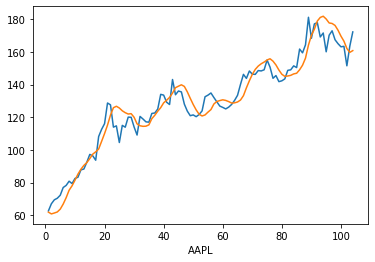

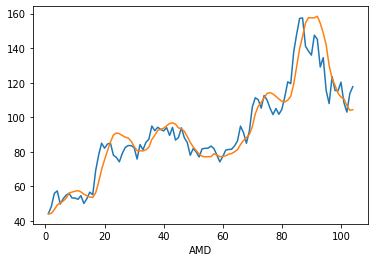

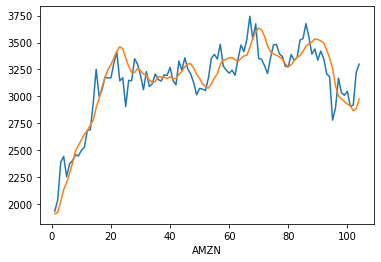

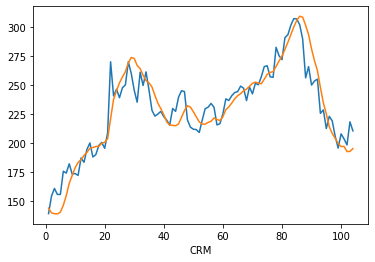

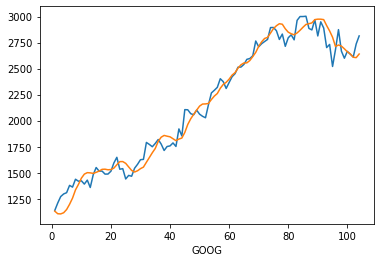

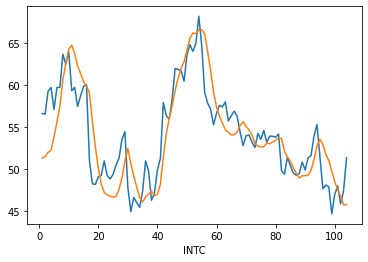

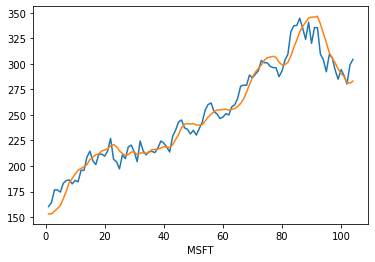

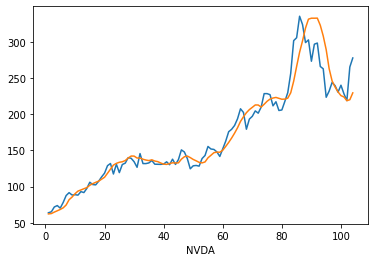

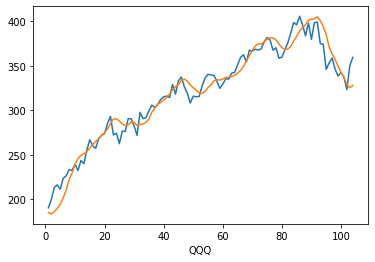

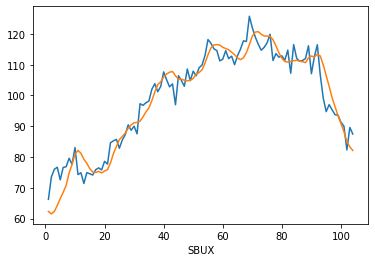

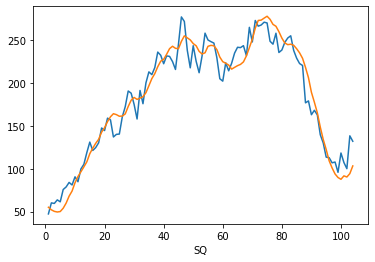

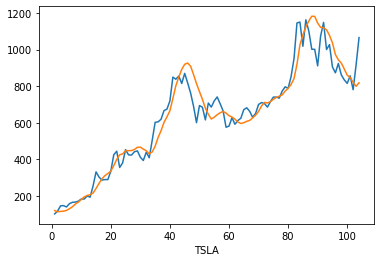

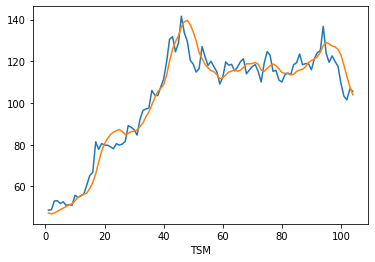

In [734]:
# plot for each stock the open price and the prediction price
# open (blue) below prediction (orange) = stock is underperforming

for i in stock_list:
    x = df['Index']
    y = df[str(i)]
    plt.plot(x, y)

    x = df['Index']
    y = df[str(i) + ' pred']
    plt.plot(x, y)

    plt.xlabel(i)
    plt.show()

#### At this point, the foundation is set and strategies can be created and tested.

In [735]:
# determine the weeks where pred/open is >1 and therefore they are better weeks to buy in
# steady stocks could be at about 50/50 but stocks exponentially rising could have open to 0 pred/open > 1

for j in stock_list:
    nlist = []
    for i in range(len(df)):
        if df[j + ' pred/open'].iloc[i] >= 1:
            nlist.append(1)
        else:
            nlist.append(0)

    df[j + ' >1'] = nlist

# square the pred/open number as a more extreme option for calculations

for j in stock_list:
    df[j +' pred/open2'] = df[j +' pred/open']**2 # make the value differences a little more pronounced

# df.tail(10)

In [736]:
# add a space to the beginning of each string, add an x to the end for more defined find functions
d_list = [' ' + d_list[i] for i, v in enumerate(d_list)]
d_list_str = [d_list[i] + 'x' for i, v in enumerate(d_list)]
d_list_str = ''.join(d_list_str)
d_list_str

' baselinex baseline_dbx opt2x opt2_dbx opt5x opt5_dbx opt6x opt6_dbx opt7x opt7_dbx opt8x'

In [751]:
# Create all of the strategies to test 

for j, z in zip(stock_list, contrib_amt):
    
# baseline - buy in $10 bi-weekly no matter what - baseline
    if d_list_str.find('baselinex') >= 0:
        df[j +' baseline'] = 0
        df[j +' baseline_stk'] = 0
        v = invest
        for i in range(len(df)):
            df[j +' baseline'].iloc[i] = z
            df[j +' baseline_stk'].iloc[i] = df[j +' baseline'].iloc[i]/df[j].iloc[i]
            v -= z
            if v < z:
                break

# baseline - dynamic
    if d_list_str.find('baseline_dbx') >= 0:
        df[j +' baseline_db'] = 0
        df[j +' baseline_db_stk'] = 0
        v = invest
        for i in range(len(df)):
            df[j +' baseline_db'].iloc[i] = round(df_baseline.iloc[i][j],2)
            df[j +' baseline_db_stk'].iloc[i] = df[j +' baseline_db'].iloc[i]/df[j].iloc[i]
            v -= round(df_baseline.iloc[i][j],2)
            if v < round(df_baseline.iloc[i][j],2):
                break

# opt1 - buy in every other week but proportionally to the pred/open
    if d_list_str.find('opt1x') >= 0:
        df[j +' opt1'] = 0
        df[j +' opt1_stk'] = 0
        v = invest
        for i in range(len(df)):
            df[j +' opt1'].iloc[i] = z * df[j +' pred/open'].iloc[i]
            df[j +' opt1_stk'].iloc[i] = df[j +' opt1'].iloc[i]/df[j].iloc[i]
            v -= z * df[j +' pred/open'].iloc[i]
            if i == (len(df)-1):
                t = i
            else:
                t = i + 1
            if v < z * df[j +' pred/open'].iloc[t]:
                break

# opt1 - dynamic baseline
    if d_list_str.find('opt1_dbx') >= 0:
        df[j +' opt1_db'] = 0
        df[j +' opt1_db_stk'] = 0
        v = invest
        for i in range(len(df)):
            df[j +' opt1_db'].iloc[i] = round(df_baseline.iloc[i][j],2) * df[j +' pred/open'].iloc[i]
            df[j +' opt1_db_stk'].iloc[i] = df[j +' opt1_db'].iloc[i]/df[j].iloc[i]
            v -= round(df_baseline.iloc[i][j],2) * df[j +' pred/open'].iloc[i]
            if i == (len(df)-1):
                t = i
            else:
                t = i+1
            if v < round(df_baseline.iloc[i][j],2) * df[j +' pred/open'].iloc[t]:
                break
 
# opt2 - buy in every other week but proportionally to the square of pred/open
    if d_list_str.find('opt2x') >= 0:
        df[j +' opt2'] = 0
        df[j +' opt2_stk'] = 0
        v = invest
        for i in range(len(df)):
            df[j +' opt2'].iloc[i] = z * df[j +' pred/open2'].iloc[i]
            df[j +' opt2_stk'].iloc[i] = df[j +' opt2'].iloc[i]/df[j].iloc[i]
            v -= z * df[j +' pred/open2'].iloc[i]
            if i == (len(df)-1):
                t = i
            else:
                t = i+1
            if v < z * df[j +' pred/open2'].iloc[t]:
                break

# opt2 - dynamic baseline
    if d_list_str.find('opt2_dbx') >= 0:
        df[j +' opt2_db'] = 0
        df[j +' opt2_db_stk'] = 0
        v = invest
        for i in range(len(df)):
            df[j +' opt2_db'].iloc[i] = round(df_baseline.iloc[i][j],2) * df[j +' pred/open2'].iloc[i]
            df[j +' opt2_db_stk'].iloc[i] = df[j +' opt2_db'].iloc[i]/df[j].iloc[i]
            v -= round(df_baseline.iloc[i][j],2) * df[j +' pred/open2'].iloc[i]
            if i == (len(df)-1):
                t = i
            else:
                t = i+1
            if v < round(df_baseline.iloc[i][j],2) * df[j +' pred/open2'].iloc[t]:
                break

# opt3 - buy in every other week. 0 on days <1 and twice the normal bi-weekly contribution on days >= 1
    if d_list_str.find('opt3x') >= 0:
        df[j +' opt3'] = 0
        df[j +' opt3_stk'] = 0
        v = invest
        for i in range(len(df)):
            df[j +' opt3'].iloc[i] = z * 2 * df[j +' >1'].iloc[i] 
            df[j +' opt3_stk'].iloc[i] = df[j +' opt3'].iloc[i]/df[j].iloc[i]
            v -= z * 2 * df[j +' >1'].iloc[i]
            if i == (len(df)-1):
                t = i
            else:
                t = i+1
            if v < z * 2 * df[j +' >1'].iloc[t]:
                break

# opt3 - dynamic baseline
    if d_list_str.find('opt3_dbx') >= 0:
        df[j +' opt3_db'] = 0
        df[j +' opt3_db_stk'] = 0
        v = invest
        for i in range(len(df)):
            df[j +' opt3_db'].iloc[i] = round(df_baseline.iloc[i][j],2) * 2 * df[j +' >1'].iloc[i] 
            df[j +' opt3_db_stk'].iloc[i] = df[j +' opt3_db'].iloc[i]/df[j].iloc[i]
            v -= round(df_baseline.iloc[i][j],2) * 2 * df[j +' >1'].iloc[i]
            if i == (len(df)-1):
                t = i
            else:
                t = i+1
            if v < round(df_baseline.iloc[i][j],2) * 2 * df[j +' >1'].iloc[t]:
                break

# opt4 - buy in every other week but proportionally to the inverse of pred/open
# This is more of a validation and will ideally return negative compared to baseline
    if d_list_str.find('opt4x') >= 0:
        df[j +' opt4'] = 0
        df[j +' opt4_stk'] = 0
        v = invest
        for i in range(len(df)):
            df[j +' opt4'].iloc[i] = z/df[j +' pred/open'].iloc[i]
            df[j +' opt4_stk'].iloc[i] = df[j +' opt4'].iloc[i]/df[j].iloc[i]
            v -= z/df[j +' pred/open'].iloc[i]
            if i == (len(df)-1):
                t = i
            else:
                t = i+1
            if v < z/df[j +' pred/open'].iloc[t]:
                break

# opt4 - dynamic baseline
    if d_list_str.find('opt4_dbx') >= 0:
        df[j +' opt4_db'] = 0
        df[j +' opt4_db_stk'] = 0
        v = invest
        for i in range(len(df)):
            df[j +' opt4_db'].iloc[i] = round(df_baseline.iloc[i][j],2) / df[j +' pred/open'].iloc[i]
            df[j +' opt4_db_stk'].iloc[i] = df[j +' opt4_db'].iloc[i]/df[j].iloc[i]
            v -= round(df_baseline.iloc[i][j],2) / df[j +' pred/open'].iloc[i]
            if i == (len(df)-1):
                t = i
            else:
                t = i+1
            if v < round(df_baseline.iloc[i][j],2) / df[j +' pred/open'].iloc[t]:
                break

# opt5
    if d_list_str.find('opt5x') >= 0:
        df[j +' opt5'] = 0
        df[j +' opt5_stk'] = 0
        v = invest
        for i in range(len(df)):
            if df[j +' pred/open2'].iloc[i] < buyvalue:
                df[j +' opt5'].iloc[i] = z
            else:
                df[j +' opt5'].iloc[i] = round(z * df[j +' pred/open2'].iloc[i] * multiplier,2)
            df[j +' opt5_stk'].iloc[i] = df[j +' opt5'].iloc[i]/df[j].iloc[i]
            v -= z*df[j +' pred/open2'].iloc[i] ### isn't correct for this algorithm, don't worry about it while I'm going with inf invest
            if i == (len(df)-1):
                t = i
            else:
                t = i+1
            if v < z*df[j +' pred/open2'].iloc[t]:
                break

# opt5_db
    if d_list_str.find('opt5_dbx') >= 0:
        df[j +' opt5_db'] = 0
        df[j +' opt5_db_stk'] = 0
        v = invest
        for i in range(len(df)):
            if df[j +' pred/open2'].iloc[i] < buyvalue:
                df[j +' opt5_db'].iloc[i] = round(df_baseline.iloc[i][j],2)
            else:
                df[j +' opt5_db'].iloc[i] = round(round(df_baseline.iloc[i][j],2) * df[j +' pred/open2'].iloc[i] * multiplier,2)
            df[j +' opt5_db_stk'].iloc[i] = df[j +' opt5_db'].iloc[i]/df[j].iloc[i]
            v -= round(df_baseline.iloc[i][j],2) * df[j +' pred/open2'].iloc[i] ### isn't correct for this algorithm, don't worry about it while I'm going with inf invest
            if i == (len(df)-1):
                t = i
            else:
                t = i+1
            if v < round(df_baseline.iloc[i][j],2) * df[j +' pred/open2'].iloc[t]:
                break

# opt6
    if d_list_str.find('opt6x') >= 0:
        df[j +' opt6'] = 0
        df[j +' opt6_stk'] = 0
        v = invest
        for i in range(len(df)):
            if df[j +' pred/open2'].iloc[i] < buyvalue:
                df[j +' opt6'].iloc[i] = z
            else:
                df[j +' opt6'].iloc[i] = z * multiplier2
            df[j +' opt6_stk'].iloc[i] = df[j +' opt6'].iloc[i]/df[j].iloc[i]
            v -= z*df[j +' pred/open2'].iloc[i] ### isn't correct for this algorithm, don't worry about it while I'm going with inf invest
            if i == (len(df)-1):
                t = i
            else:
                t = i+1
            if v < z * df[j +' pred/open2'].iloc[t]:
                break

# opt6 - dynamic baseline
    if d_list_str.find('opt6_dbx') >= 0:
        df[j +' opt6_db'] = 0
        df[j +' opt6_db_stk'] = 0
        v = invest
        for i in range(len(df)):
            if df[j +' pred/open2'].iloc[i] < buyvalue:
                df[j +' opt6_db'].iloc[i] = round(df_baseline.iloc[i][j],2)
            else:
                df[j +' opt6_db'].iloc[i] = round(df_baseline.iloc[i][j],2) * multiplier2
            df[j +' opt6_db_stk'].iloc[i] = df[j +' opt6_db'].iloc[i]/df[j].iloc[i]
            v -= round(df_baseline.iloc[i][j],2) * df[j +' pred/open2'].iloc[i] ### isn't correct for this algorithm, don't worry about it while I'm going with inf invest
            if i == (len(df)-1):
                t = i
            else:
                t = i+1
            if v < round(df_baseline.iloc[i][j],2) * df[j +' pred/open2'].iloc[t]:
                break

# opt7
    if d_list_str.find('opt7x') >= 0:
        df[j +' opt7'] = 0
        df[j +' opt7_stk'] = 0
        v = invest
        for i in range(len(df)):
            if df[j +' pred/open2'].iloc[i] < buyvalue2:
                df[j +' opt7'].iloc[i] = z
            else:
                df[j +' opt7'].iloc[i] = round(z * df[j +' pred/open2'].iloc[i] * multiplier3,2)
            df[j +' opt7_stk'].iloc[i] = df[j +' opt7'].iloc[i]/df[j].iloc[i]
            v -= z*df[j +' pred/open2'].iloc[i] ### isn't correct for this algorithm, don't worry about it while I'm going with inf invest
            if i == (len(df)-1):
                t = i
            else:
                t = i+1
            if v < z*df[j +' pred/open2'].iloc[t]:
                break

# opt7 - dynamic baseline
    if d_list_str.find('opt7_dbx') >= 0:
        df[j +' opt7_db'] = 0
        df[j +' opt7_db_stk'] = 0
        v = invest
        for i in range(len(df)):
            if df[j +' pred/open2'].iloc[i] < buyvalue2:
                df[j +' opt7_db'].iloc[i] = round(df_baseline.iloc[i][j],2)
            else:
                df[j +' opt7_db'].iloc[i] = round(round(df_baseline.iloc[i][j],2) * df[j +' pred/open2'].iloc[i] * multiplier3,2)
            df[j +' opt7_db_stk'].iloc[i] = df[j +' opt7_db'].iloc[i]/df[j].iloc[i]
            v -= round(df_baseline.iloc[i][j],2) * df[j +' pred/open2'].iloc[i] ### isn't correct for this algorithm, don't worry about it while I'm going with inf invest
            if i == (len(df)-1):
                t = i
            else:
                t = i+1
            if v < round(df_baseline.iloc[i][j],2) * df[j +' pred/open2'].iloc[t]:
                break


######################## I/P
# for j, z in zip(stock_list, contrib_amt):
# opt8
    if d_list_str.find('opt8x') >= 0:
        df[j +' opt8'] = 0
        df[j +' opt8_sell'] = 0 ############# must track how much I sell. I can just sum the purchases and sales
        df[j +' opt8_stk'] = 0

        v = invest
        stock_non_neg = 0 ########### make sure stock in never negative

        for i in range(len(df)):
            if df[j +' pred/open2'].iloc[i] < buyvalue and df[j +' pred/open2'].iloc[i] > 1/buyvalue: # buy normal
                df[j +' opt8'].iloc[i] = z
            elif df[j +' pred/open2'].iloc[i] > buyvalue: # buy higher
                df[j +' opt8'].iloc[i] = round(z * df[j +' pred/open2'].iloc[i] * multiplier, 2)
            else: # sell option
                df[j +' opt8'].iloc[i] = round(z / 1/df[j +' pred/open2'].iloc[i] * multiplier * -1, 2)
            
            df[j +' opt8_stk'].iloc[i] = df[j +' opt8'].iloc[i]/df[j].iloc[i] # stock gain/loss per week

            stock_non_neg += df[j +' opt8_stk'].iloc[i]
                ######## how to recursively not buy in when the stock will hit negative? maybe set dummy mirror variables?

            v -= z*df[j +' pred/open2'].iloc[i] ### isn't correct for this algorithm, don't worry about it while I'm going with inf invest
            if i == (len(df)-1):
                t = i
            else:
                t = i+1
            if v < z*df[j +' pred/open2'].iloc[t]:
                break

# export data at current date/time
try:
    ymdt = ymd + '_' + datetime.now().strftime('%H%M%S')
    df.to_csv(f'C:/Users/james/OneDrive/Desktop/Projects/Stocks_1/Exports/stocks_df_export_{ymdt}.csv', index = False)
except:
    print('Can\'t export data')

# df.tail(10)

In [738]:
#df
#df.to_csv(f'/Volumes/Google Drive/My Drive/Python/other_projects/data_export.csv', index = False)

View final results (simulated aggregate over time)

In [739]:
########################## I/P fails with different standard contrib amounts???

print('baseline - contribute consistently every other week')
print('opt1 - buy in every other week proportional to the pred/open variable')
print('opt2 - buy in every other week proportional to the square of pred/open variable')
print('opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/open is >=1')
print('opt4 - buy in every other week inversely proportional to the pred/open variable')
print('opt5 - normal buy in, boosted at high pred/open')
print('opt6 - normal buy in, boosted at high pred/open, more consistently')
print('opt7 - normal buy in, boosted at high pred/open, smaller multiplier')
print('opt8 - buy/sell')

df_bought_in = pd.DataFrame()
df_profit = pd.DataFrame()
df_diff = pd.DataFrame()
df2 = pd.DataFrame()

for j in stock_list:

    # general set
    for i, v in enumerate(d_list):
        df2['Index'] = np.arange(1,len(d_list)+1)
        df2[j + ' name'] = d_list

    # unique per row set
    bought_temp = []
    stocks_held_temp = []
    profit_temp = []
    for i, v in enumerate(d_list):
        bought_temp.append(round(np.sum(df[j + v]),2))
        stocks_held_temp.append(round(np.sum(df[j + v + '_stk']),4))
        profit_temp.append(round((np.sum(df[j + v + '_stk']) * df[j].iloc[invest_weeks-1]) - np.sum(df[j + v]),2))
    df2[j + ' bought_in'] = bought_temp
    df2[j + ' stocks_held'] = stocks_held_temp
    df2[j + ' profit'] = profit_temp

    # whole row logic set
    df2[j + ' diff'] = -1
    for i, v in enumerate(d_list):
        df2[j + ' diff'].iloc[i] = round(df2[j + ' profit'].iloc[i]-df2[j + ' profit'].iloc[0],2)
    df2[j + ' %_diff'] = round((df2[j + ' diff']/df2[j + ' profit'])*100,2)


# df_bought_in['name'] = d_list
# df_profit['name'] = d_list
# df_diff['name'] = d_list

for j in stock_list:
    df_bought_in[j + ' bought_in'] = df2[j + ' bought_in']
    df_profit[j + ' profit'] = df2[j + ' profit']
    df_diff[j + ' diff'] = df2[j + ' diff']

# df2


baseline - contribute consistently every other week
opt1 - buy in every other week proportional to the pred/open variable
opt2 - buy in every other week proportional to the square of pred/open variable
opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/open is >=1
opt4 - buy in every other week inversely proportional to the pred/open variable
opt5 - normal buy in, boosted at high pred/open
opt6 - normal buy in, boosted at high pred/open, more consistently
opt7 - normal buy in, boosted at high pred/open, smaller multiplier
opt8 - buy/sell


In [740]:
# how much was ivested
# no amount should be above the previously set 'invest' amount
# row 0 = baselines. Rows 1-4 = options 1-4

df_bought_in


AAPL bought_in  AMD bought_in  AMZN bought_in  CRM bought_in  \
0           100.00          97.50          100.00         100.00   
1            98.76          99.06           97.93          98.34   
2            95.67          97.98           98.13          98.85   
3            97.53          99.80           98.42          99.48   
4           105.00         204.71          124.31         113.27   
5           150.48         185.45          129.40         130.74   
6           105.00         153.75          112.50         107.50   
7           127.26         144.36          115.66         116.64   
8           119.29         135.38          129.63         128.85   
9           127.42         138.20          130.97         134.30   
10         -151.61          47.91           67.27          20.17   

    GOOG bought_in  INTC bought_in  MSFT bought_in  NVDA bought_in  \
0           100.00           97.50          100.00           97.50   
1            98.78           96.16           99.08           96.27   
2            98.16           99.62           98.89           98.59   
3            99.94           96.26           99.09           99.56   
4           125.46          143.83          100.00          140.15   
5           121.39          141.74          100.54          123.38   
6           115.00          123.75          100.00          123.75   
7           113.47          121.72          100.54          115.43   
8           130.31          130.53          130.74          131.57   
9           130.52          129.34          131.00          130.51   
10           31.02           34.53           63.36            3.03   

    QQQ bought_in  SBUX bought_in  SQ bought_in  TSLA bought_in  TSM bought_in  
0          100.00          100.00        100.00          100.00          97.50  
1           98.83           99.61         99.30           96.87          98.79  
2           97.89           98.66         97.51           99.23          98.25  
3           99.32           98.62         99.47           92.49          96.45  
4          112.55          128.20        174.73          165.74         120.30  
5          112.02          126.19        204.06          168.38         113.01  
6          107.50          117.50        140.00          140.00         112.50  
7          107.58          115.36        153.21          137.38         107.19  
8          121.32          125.60        131.76          138.53         128.04  
9          123.51          128.11        137.48          123.09         120.97  
10          57.04           48.32        -52.84         -246.91           7.43

In [741]:
# profits made above/below the investment
# row 0 = baselines. Rows 1-4 = options 1-4

df_profit


AAPL profit  AMD profit  AMZN profit  CRM profit  GOOG profit  \
0        106.32       92.12        15.51       -3.99        87.02   
1         76.31       93.11        20.53        0.39        75.89   
2         97.51       92.57        15.08       -4.26        84.87   
3         73.18       92.92        20.06       -0.53        75.32   
4        108.01      164.76        18.03       -5.63       112.80   
5        105.05      150.99        23.34       -3.60        96.54   
6        108.01      131.05        16.88       -4.92       102.21   
7         91.97      124.10        22.07       -1.87        88.53   
8        121.13      126.08        19.10       -5.30       112.88   
9         94.19      126.04        25.45       -1.11        99.49   
10      -209.06       48.86         3.57      -18.84        15.14   

    INTC profit  MSFT profit  NVDA profit  QQQ profit  SBUX profit  SQ profit  \
0         -6.82        51.51       190.65       38.47         5.62      13.77   
1        -10.12        52.63       201.88       36.00        -5.73      16.06   
2         -6.46        50.55       186.61       36.95         4.88       8.61   
3        -10.05        52.02       200.67       35.04        -5.91      12.78   
4         -5.32        51.51       247.13       43.11        10.37      34.13   
5        -11.47        53.25       237.85       40.35        -5.26      30.32   
6         -6.03        51.51       225.06       41.24         8.22      23.77   
7        -10.91        53.25       226.99       38.72        -5.48      23.46   
8         -8.63        66.90       243.91       46.14         6.55      15.27   
9        -13.67        68.72       260.20       43.88        -7.63      18.91   
10         7.29        25.01       -91.41        6.90        -2.10    -119.31   

    TSLA profit  TSM profit  
0        474.16       68.92  
1        619.16       38.55  
2        447.61       66.38  
3        593.66       37.02  
4        837.69       76.76  
5       1252.28       43.58  
6        670.09       74.00  
7        960.33       41.53  
8        618.58       82.48  
9        797.79       46.33  
10      -870.07       -2.84

In [742]:
# profits made above/below the baseline profits
# row 0 = baselines. Rows 1-4 = options 1-4

# df_diff[1:]

In [743]:
# final summary calculations

df_summary = pd.DataFrame()

profit_temp = []
core_temp = []
invest_temp = []
invest_over_temp = []
perc_invest_over_temp = []
perc_above_temp = []
norm_profit = []
norm_over_base = []
norm_perc_over_base = []

for i, v in enumerate(d_list):
      df_summary['strategy'] = d_list
      profit_temp.append(round(sum(df_diff.iloc[i]),2))
      core_temp.append(round(sum(df_profit.iloc[i]),2))
      invest_temp.append(round(sum(df_bought_in.iloc[i]),2))
      invest_over_temp.append(round(sum(df_bought_in.iloc[i])-sum(df_bought_in.iloc[0]),2))
      perc_invest_over_temp.append(round((sum(df_bought_in.iloc[i])/sum(df_bought_in.iloc[0])-1)*100,2))
      perc_above_temp.append(round(sum(df_diff.iloc[i])/sum(df_profit.iloc[0])*100,2))
      norm_profit.append(round(sum(df_bought_in.iloc[0])/sum(df_bought_in.iloc[i])*sum(df_profit.iloc[i]),2))
      norm_perc_over_base.append(round((norm_profit[i]/norm_profit[0]-1)*100,2))
      norm_over_base.append(round((sum(df_bought_in.iloc[0])/sum(df_bought_in.iloc[i])*sum(df_profit.iloc[i]))-(sum(df_bought_in.iloc[0])/sum(df_bought_in.iloc[0])*sum(df_profit.iloc[0])),2))

df_summary['investment'] = invest_temp
df_summary['bought in over base'] = invest_over_temp
df_summary['bought in % over base'] = perc_invest_over_temp
df_summary['profit'] = core_temp
df_summary['profit over baseline'] = profit_temp
df_summary['profit % above base'] = perc_above_temp
df_summary['norm profit'] = norm_profit
df_summary['norm profit over base'] = norm_over_base
df_summary['norm profit % over base'] = norm_perc_over_base

df_summary

# normalized comparisions isn't a perfect strategy. All of the options are fundamentally different and 
# an X% reduction in contributions won't result in a perfect X% reduction in profits.
# this is mostly due to the options that have contrib multipliers based on current stock performance.

strategy  investment  bought in over base  bought in % over base  \
0       baseline     1290.00                 0.00                   0.00   
1    baseline_db     1277.78               -12.22                  -0.95   
2           opt2     1277.43               -12.57                  -0.97   
3        opt2_db     1276.43               -13.57                  -1.05   
4           opt5     1758.25               468.25                  36.30   
5        opt5_db     1806.78               516.78                  40.06   
6           opt6     1558.75               268.75                  20.83   
7        opt6_db     1575.80               285.80                  22.16   
8           opt7     1681.55               391.55                  30.35   
9        opt7_db     1685.42               395.42                  30.65   
10          opt8      -71.28             -1361.28                -105.53   

     profit  profit over baseline  profit % above base  norm profit  \
0   1133.26                  0.00                 0.00      1133.26   
1   1214.66                 81.40                 7.18      1226.28   
2   1080.90                -52.36                -4.62      1091.54   
3   1176.18                 42.92                 3.79      1188.68   
4   1693.35                560.09                49.42      1242.38   
5   2013.22                879.96                77.65      1437.39   
6   1441.09                307.83                27.16      1192.63   
7   1652.69                519.43                45.84      1352.94   
8   1445.09                311.83                27.52      1108.60   
9   1558.59                425.33                37.53      1192.93   
10 -1206.86              -2340.12              -206.49     21841.32   

    norm profit over base  norm profit % over base  
0                    0.00                     0.00  
1                   93.02                     8.21  
2                  -41.72                    -3.68  
3                   55.42                     4.89  
4                  109.12                     9.63  
5                  304.13                    26.84  
6                   59.37                     5.24  
7                  219.68                    19.38  
8                  -24.66                    -2.18  
9                   59.67                     5.27  
10               20708.06                  1827.30

In [744]:
# export data at current date/time
try:
    ymdt = ymd + '_' + datetime.now().strftime('%H%M%S')
    df_summary.to_csv(f'C:/Users/james/OneDrive/Desktop/Projects/Stocks_1/Exports/stocks_summary_{ymdt}.csv', index = False)
except:
    print('Can\'t export data')

In [745]:
now = pd.DataFrame()
opts = [f'# >= {buyvalue}', f'# < {buyvalue}', 'Total', f'Rate of >= {buyvalue}']
now['Method'] = opts

for j in stock_list:
    nlist = []
    for i in range(len(opts)):
        if i == 0:
            x = 0 
            for k in range(len(df)-1):
                if df[j + ' pred/open2'].iloc[k] >= buyvalue:
                    x += 1
        elif i == 1: 
            x = 0 
            for k in range(len(df)-1):
                if df[j + ' pred/open2'].iloc[k] < buyvalue:
                    x += 1
        elif i == 2:
            x = len(df)   
        elif i == 3:
            y = 0 
            for k in range(len(df)-1):
                if df[j + ' pred/open2'].iloc[k] >= buyvalue:
                    y += 1
            x = round(y/len(df),4)     
        else: -1
        nlist.append(f'{x}')
    now[j] = nlist

now

Method    AAPL     AMD    AMZN     CRM    GOOG    INTC    MSFT  \
0        # >= 1.2       4      14       3       6       3       8       1   
1         # < 1.2      99      89     100      97     100      95     102   
2           Total     104     104     104     104     104     104     104   
3  Rate of >= 1.2  0.0385  0.1346  0.0288  0.0577  0.0288  0.0769  0.0096   

     NVDA     QQQ    SBUX      SQ    TSLA     TSM  
0      12       2       5      15      20       7  
1      91     101      98      88      83      96  
2     104     104     104     104     104     104  
3  0.1154  0.0192  0.0481  0.1442  0.1923  0.0673

Current recommendations (present day)

In [746]:
print('Using one of the strategies, most recent Monday\'s buy in values are listed.')

now = pd.DataFrame()

now.index = d_list

for j in stock_list:
    nlist = []
    for i, v in enumerate(d_list):
        nlist.append(round(df[j + v].iloc[invest_weeks-1],2))
    now[j] = nlist

now


Using one of the strategies, most recent Monday's buy in values are listed.


AAPL  AMD  AMZN  CRM  GOOG  INTC  MSFT  NVDA  QQQ  SBUX   SQ  \
 baseline      0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.0   0.0  0.0   
 baseline_db   0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.0   0.0  0.0   
 opt2          0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.0   0.0  0.0   
 opt2_db       0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.0   0.0  0.0   
 opt5          0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.0   0.0  0.0   
 opt5_db       0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.0   0.0  0.0   
 opt6          0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.0   0.0  0.0   
 opt6_db       0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.0   0.0  0.0   
 opt7          0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.0   0.0  0.0   
 opt7_db       0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.0   0.0  0.0   
 opt8          0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.0   0.0  0.0   

              TSLA  TSM  
 baseline      0.0  0.0  
 baseline_db   0.0  0.0  
 opt2          0.0  0.0  
 opt2_db       0.0  0.0  
 opt5          0.0  0.0  
 opt5_db       0.0  0.0  
 opt6          0.0  0.0  
 opt6_db       0.0  0.0  
 opt7          0.0  0.0  
 opt7_db       0.0  0.0  
 opt8          0.0  0.0

In [747]:
# export data at current date/time
try:
    ymdt = ymd + '_' + datetime.now().strftime('%H%M%S')
    now.to_csv(f'C:/Users/james/OneDrive/Desktop/Projects/Stocks_1/Exports/stocks_export_{ymdt}.csv')
except:
    print('Can\'t export data')

In [748]:
print(f'Current setup for active use - opt5: {roll_days = }, pred/open2, {buyvalue = }, {multiplier = }, {invest = }')
print('Most recent Monday\'s buy in values are listed.')

opt0_cost = 0
opt5_cost = 0
opt5_db_cost = 0
for i in stock_list:
    opt0_cost += now.iloc[0][i]
    opt5_cost += now.iloc[4][i]
    opt5_db_cost += now.iloc[5][i]
    
print(f'{opt0_cost:.2f} -{now.index[0]} total today buy in')
print(f'{opt5_cost:.2f} -{now.index[4]} total today buy in')
print(f'{opt5_db_cost:.2f} -{now.index[5]} total today buy in')
print(f'Values calculated for: {trade_day_date}')

now.iloc[[0, 1, 4, 5]]


Current setup for active use - opt5: roll_days = 65, pred/open2, buyvalue = 1.2, multiplier = 5, invest = 100
Most recent Monday's buy in values are listed.
0.00 - baseline total today buy in
0.00 - opt5 total today buy in
0.00 - opt5_db total today buy in
Values calculated for: 2022.03.28


AAPL  AMD  AMZN  CRM  GOOG  INTC  MSFT  NVDA  QQQ  SBUX   SQ  \
 baseline      0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.0   0.0  0.0   
 baseline_db   0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.0   0.0  0.0   
 opt5          0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.0   0.0  0.0   
 opt5_db       0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.0   0.0  0.0   

              TSLA  TSM  
 baseline      0.0  0.0  
 baseline_db   0.0  0.0  
 opt5          0.0  0.0  
 opt5_db       0.0  0.0

In [749]:
print('pred/open2 current values')
for j in stock_list:
    if df[j +' pred/open2'].iloc[invest_weeks-1] < buyvalue:
        print(round(df[j +' pred/open2'].iloc[invest_weeks-1],4), j)
    else:
        print(round(df[j +' pred/open2'].iloc[invest_weeks-1],4), j, '>', buyvalue)

pred/open2 current values
0.8717 AAPL
0.7866 AMD
0.8136 AMZN
0.8599 CRM
0.8804 GOOG
0.7947 INTC
0.8652 MSFT
0.6828 NVDA
0.8326 QQQ
0.8813 SBUX
0.6115 SQ
0.5903 TSLA
0.9683 TSM


In [750]:
end = time.perf_counter()
print('Current date/time: ', datetime.now().strftime("%B %d, %Y %H:%M:%S"))
print(f'Seconds to run the script: {round(end - start,2)}')

Current date/time:  April 02, 2022 16:33:28
Seconds to run the script: 12.2


#### "Final" notes

Stocks going up parabolically will almost never be above 1, so I can't simply not buy in when pred/open is not above 1. GOOG is like this as of 9/3/2021. This kind of stock will also produce worse than baseline profits for opt1 and opt2 because they won't be investing the full 500 over the course of the investment period. Option 3 is not viable.

Stocks in a big S-curve, flat ~ rise ~ flat, will only have a pred/open above 1 on the latter half of the year, so again, I can't contribute nothing. TSM and TSLA are like this as of 9/3/2021. Option 3 is not viable.

Options 1 and 2 seem to do well on stocks with lots of variation but loses on stocks seeing exponential growth. Missing out on a stock growing exponentially will surely wipe out all gains seen elsewhere. There may be some merit to opt4, the inverse method, but the baseline probably remains the best method if a single method is picked, and based only on daily closing values, for across the board investing.

#### Round 2 running notes - 12/15/2021
rolling 1 quarter has already shown to be better than at least 1 year or 1 month<br>
1 quarter instead of my original hypothesis of 1 year seems to be much more promising<br>
opt2 focus<br>
excluded MDB due to shorter stock lifespan<b>

Current run, 3 year period ending 12/15/2021:<br>
Stocks: 'AAPL', 'AMD', 'AMZN', 'CRM', 'GOOG', 'INTC', 'MSFT', 'NVDA', 'QQQ', 'SBUX', 'SQ', 'TSLA', 'TSM'<br>
Dates '2018-12-15' - '2021-12-15'<br>
Rolling: 65 days (~1 quarter)<br>
353.39 opt2 profit over baseline. 4425.11 core profit on 6425.96 investment. 8.68 percent above baseline profit.<br>
TSLA represents most of the gains over baseline, but no individual stock did worse than baseline.<br>

Worst case end run ending on the worst part of the COVID nosedive:<br>
Stocks: 'AAPL', 'AMD', 'AMZN', 'CRM', 'GOOG', 'INTC', 'MSFT', 'NVDA', 'QQQ', 'SBUX', 'SQ', 'TSLA', 'TSM'<br>
Dates '2017-03-20' - '2020-03-20'<br>
Rolling: 65 days (~1 quarter)<br>
19.21 opt2 profit over baseline. 489.81 core profit on 6408.78 investment. 4.08 percent above baseline profit.<br>
GOOG and SBUX were worse than baseline, but not more than $1 different. Good stability<br>

Best case end run ending right before the COVID drop:<br>
Stocks: 'AAPL', 'AMD', 'AMZN', 'CRM', 'GOOG', 'INTC', 'MSFT', 'NVDA', 'QQQ', 'SBUX', 'SQ', 'TSLA', 'TSM'<br>
Dates '2017-02-14' - '2020-02-14'<br>
Rolling: 65 days (~1 quarter)<br>
18.16 opt2 profit over baseline. 3576.39 core profit on 6445.56 investment. 0.51 percent above baseline profit.<br>
TSLA has 18.40 in gains over baseline, the rest were almost a wash<br>
